In [1]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

import earthkit.data
import earthkit.plots

In [2]:
C3S_RED = "#941333"

In [3]:
csv_file = "era5_daily_series_2t_global.csv"
data = earthkit.data.from_source(
    "url",
    "https://sites.ecmwf.int/data/climatepulse/data/series/era5_daily_series_2t_global.csv",
)
data.save(csv_file)
df = pd.read_csv(csv_file, comment="#", index_col=0, parse_dates=True).round(2)

era5_daily_series_2t_global.csv: 0.00B [00:00, ?B/s]

In [4]:
start_year = 1940
end_year = 2024
data_col = "2t"

In [5]:
def get_year_data(df, year, var_name="2t"):
    data = df[df.index.year == year][var_name].values
    if len(data) == 366:
        data = np.delete(data, 58)
    return data

In [6]:
data_reference = get_year_data(df, 2000, "clim_91-20")

In [7]:
start = datetime(2000, 1, 1, 12)
dates = [start + timedelta(days=i) for i in range(365)]

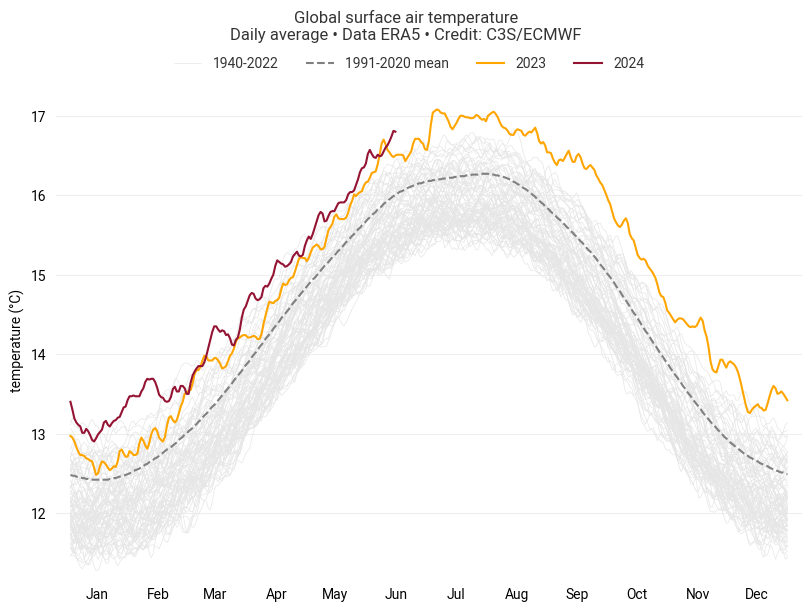

In [8]:
figure = earthkit.plots.Figure(size=(8, 6))

subplot = figure.add_subplot()
for year in range(1940, 2023):
    data = get_year_data(df, year)
    if year == 2022:
        subplot.line(y=data, x=dates, linewidth=0.5, color="#e6e6e6", label="1940-2022")
    else:
        subplot.line(y=data, x=dates, linewidth=0.5, color="#e6e6e6")
subplot.line(
    y=data_reference, x=dates, color="grey", linestyle="--", label="1991-2020 mean"
)
subplot.line(y=get_year_data(df, 2023), x=dates, color="orange", label="2023")
subplot.line(
    y=get_year_data(df, 2024),
    x=dates[: len(get_year_data(df, 2024))],
    color=C3S_RED,
    label="2024",
)

subplot.ax.xaxis.set_ticklabels([])
subplot.set_minor_xticks("M1", format="%b")

subplot.ax.set_ylabel("temperature (°C)")

subplot.ax.legend(ncol=4, loc=(0.15, 1.05), frameon=False)
figure.fig.suptitle(
    "Global surface air temperature\n" "Daily average • Data ERA5 • Credit: C3S/ECMWF"
)

figure.show()